# Feature extraction

In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# ***Data Loading***

In [17]:
rdata = "processed.cleveland2.csv"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df  = pd.read_csv(rdata, names=column_names)

In [18]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [19]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


# Shape of the data

In [21]:
df.shape

(303, 14)

# Descriptive statistics

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,130.676568,21.734575,0.0,120.0,130.0,140.0,200.0
chol,303.0,575.722772,5730.863994,126.0,211.0,241.0,275.0,99999.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,808.409241,8098.820289,71.0,133.5,153.0,166.0,99999.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#  ***Data Cleaning & Preprocessing***

In [22]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df1 = pd.read_csv("processed.cleveland2.csv", names=column_names, na_values=["?"])
df1[['trestbps']]=df1[['trestbps']].replace(0,np.nan)
df1[['chol','thalach']]=df1[['chol','thalach']].replace(99999,np.nan)
df1.dropna(inplace=True)

In [23]:
df1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,2
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0


In [24]:
df1.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
297,57,0,4,140.0,241.0,0,0,123.0,1,0.2,2,0.0,7.0,1
298,45,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0.0,7.0,1
299,68,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2.0,7.0,2
300,57,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1.0,7.0,3
301,57,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1.0,3.0,1


In [26]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,291.0,54.742268,8.884638,34.0,48.0,56.0,61.0,77.0
sex,291.0,0.676976,0.468437,0.0,0.0,1.0,1.0,1.0
cp,291.0,3.158076,0.966202,1.0,3.0,3.0,4.0,4.0
trestbps,291.0,132.065292,17.662522,94.0,120.0,130.0,140.0,200.0
chol,291.0,247.219931,52.189374,126.0,211.5,242.0,275.5,564.0
fbs,291.0,0.147766,0.355480,0.0,0.0,0.0,0.0,1.0
restecg,291.0,0.996564,0.994808,0.0,0.0,1.0,2.0,2.0
thalach,291.0,149.326460,22.702422,71.0,133.5,152.0,165.0,195.0
exang,291.0,0.329897,0.470985,0.0,0.0,0.0,1.0,1.0
oldpeak,291.0,1.068041,1.172784,0.0,0.0,0.8,1.8,6.2


In [27]:
print(df1.dtypes)

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


# Check Null value

In [28]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [29]:
df1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# One Hot Encoding

In [30]:
df1 = pd.get_dummies(df1, columns=['cp'], dummy_na=False)
df1 = pd.get_dummies(df1, columns=['sex'], dummy_na=False)
df1 = pd.get_dummies(df1, columns=['fbs'], dummy_na=False)
df1 = pd.get_dummies(df1, columns=['exang'], dummy_na=False)
df1 = pd.get_dummies(df1, columns=['restecg'], dummy_na=False)
df1 = pd.get_dummies(df1, columns=['slope'], dummy_na=False)
df1 = pd.get_dummies(df1, columns=['ca'], dummy_na=False)
df1 = pd.get_dummies(df1, columns=['thal'], dummy_na=False)
df1.head()

,age,trestbps,chol,thalach,oldpeak,num,cp_1,cp_2,cp_3,cp_4,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160.0,286.0,108.0,1.5,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67,120.0,229.0,129.0,2.6,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


# Convert the 5 class into 2 class (0 is one class and (1,2,3,4) is another class)

In [33]:
df1['num'] = df1.apply(lambda x: (1 if x['num']>0 else 0), axis=1)
df1.head(5)

,age,trestbps,chol,thalach,oldpeak,num,cp_1,cp_2,cp_3,cp_4,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160.0,286.0,108.0,1.5,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67,120.0,229.0,129.0,2.6,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [34]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,291.0,54.742268,8.884638,34.0,48.0,56.0,61.0,77.0
trestbps,291.0,132.065292,17.662522,94.0,120.0,130.0,140.0,200.0
chol,291.0,247.219931,52.189374,126.0,211.5,242.0,275.5,564.0
thalach,291.0,149.326460,22.702422,71.0,133.5,152.0,165.0,195.0
oldpeak,291.0,1.068041,1.172784,0.0,0.0,0.8,1.8,6.2
num,291.0,0.467354,0.499793,0.0,0.0,0.0,1.0,1.0
cp_1,291.0,0.079038,0.270263,0.0,0.0,0.0,0.0,1.0
cp_2,291.0,0.161512,0.368637,0.0,0.0,0.0,0.0,1.0
cp_3,291.0,0.281787,0.450645,0.0,0.0,0.0,1.0,1.0
cp_4,291.0,0.477663,0.500361,0.0,0.0,0.0,1.0,1.0


# Check Data balance in each class

<AxesSubplot:xlabel='num', ylabel='count'>

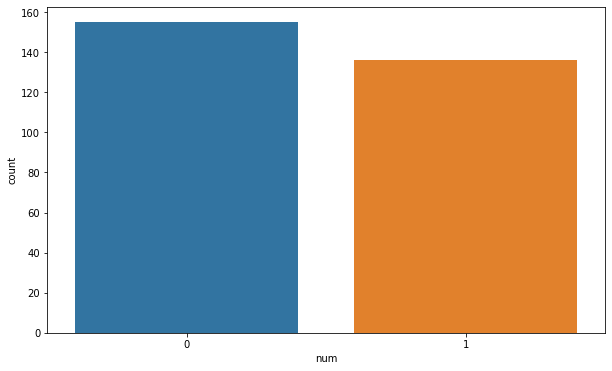

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='num', data=df1)

# ***Dimensionality Reduction with PCA***

In [39]:
df1.to_csv('updated_cleveland.csv', index=False)
X = df1.drop('num', axis=1).values
Y = df1['num'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=150)

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
x_train.shape, y_train.shape

((203, 28), (203,))

In [42]:
x_test.shape, y_test.shape

((88, 28), (88,))

In [43]:
def get_models():
	models = dict()
	for i in range(1,25):
		steps = [('pca', PCA(n_components=i)), ('m', SVC(kernel='linear'))]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [44]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.842 (0.070)
>2 0.849 (0.076)
>3 0.855 (0.071)
>4 0.850 (0.066)
>5 0.847 (0.067)
>6 0.844 (0.080)
>7 0.842 (0.065)
>8 0.837 (0.073)
>9 0.837 (0.080)
>10 0.833 (0.076)
>11 0.828 (0.075)
>12 0.827 (0.080)
>13 0.828 (0.082)
>14 0.829 (0.072)
>15 0.832 (0.075)
>16 0.825 (0.078)
>17 0.807 (0.087)
>18 0.819 (0.079)
>19 0.811 (0.081)
>20 0.814 (0.078)
>21 0.814 (0.078)
>22 0.814 (0.078)
>23 0.814 (0.078)
>24 0.814 (0.078)


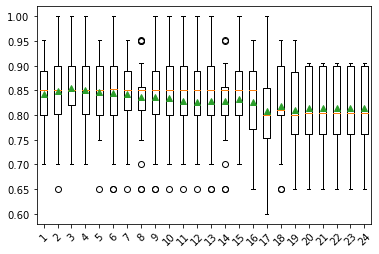

In [45]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [46]:
pca = PCA()
pca.fit(x_train)
pca.transform(x_train)

array([[-2.02502790e-01, -1.30086033e+00, -1.19465673e+00, ...,
         1.38777878e-16,  2.22044605e-16, -1.21430643e-16],
       [ 2.65729274e+00, -4.85948912e-01,  1.74367494e-01, ...,
        -1.11022302e-16,  7.77156117e-16,  6.66133815e-16],
       [ 3.96044839e+00, -9.25771731e-01,  6.32151156e-01, ...,
         1.11022302e-16, -5.55111512e-17,  2.22044605e-16],
       ...,
       [-1.63160806e+00,  1.38280579e-01,  1.81474971e+00, ...,
        -3.33066907e-16,  1.59594560e-16, -3.88578059e-16],
       [-2.03993719e+00,  3.96061539e-01,  2.11070287e+00, ...,
        -5.61958260e-16,  3.93487246e-16, -6.24713500e-17],
       [ 3.04323642e+00,  1.26064781e-01,  1.17617247e+00, ...,
        -1.52563519e-16, -4.66935598e-16,  5.34273526e-16]])

# Print 3 Principal Components

In [52]:
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(x_train)
print(pca.explained_variance_)

[5.07235149 2.59097862 2.49716102]


C:\Users\myneee101\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


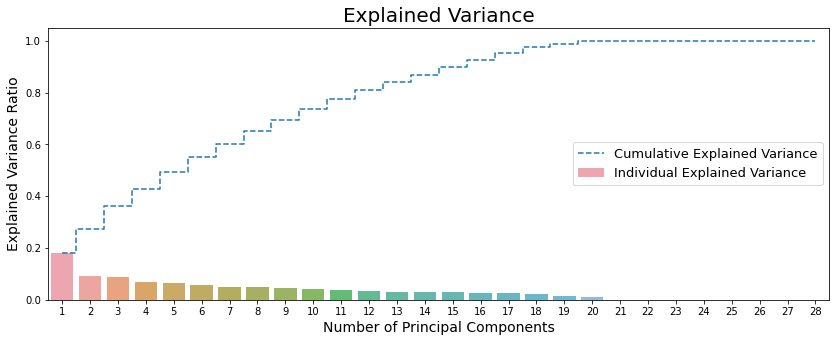

In [47]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(range(x_train.shape[1]), pca.explained_variance_ratio_.cumsum(), linestyle='--', drawstyle='steps-mid', label='Cumulative Explained Variance')
sns.barplot(np.arange(1, x_train.shape[1]+1), pca.explained_variance_ratio_, alpha=0.85,
            label='Individual Explained Variance')

plt.ylabel('Explained Variance Ratio', fontsize = 14)
plt.xlabel('Number of Principal Components', fontsize = 14)
ax.set_title('Explained Variance', fontsize = 20)
plt.legend(loc='center right', fontsize = 13);

# Independent Component Analysis (ICA)

In [68]:
X = df1.drop(['num'], axis = 1)
Y = df1['num']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [49]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [53]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)
forest_test(X_ica, Y)

0.734375
[[37  7]
 [12 32]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        44
           1       0.82      0.73      0.77        44

    accuracy                           0.78        88
   macro avg       0.79      0.78      0.78        88
weighted avg       0.79      0.78      0.78        88



# Linear Discriminant Analysis (LDA)

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 28
Reduced number of features: 1


In [58]:
forest_test(X_lda, Y)

0.359375
[[36  8]
 [ 9 35]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        44
           1       0.81      0.80      0.80        44

    accuracy                           0.81        88
   macro avg       0.81      0.81      0.81        88
weighted avg       0.81      0.81      0.81        88



In [81]:
X = df1.drop(['num'], axis = 1)
Y = df1['num']

In [82]:
X = pd.get_dummies(X, prefix_sep='_')
X.head()

,age,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,cp_4,sex_0,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,145.0,233.0,150.0,2.3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160.0,286.0,108.0,1.5,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120.0,229.0,129.0,2.6,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


# Recursive Feature Elimination

In [83]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 28)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(x_train,y_train)
RFE_X_Test = rfe.transform(x_test)
rfe = rfe.fit(RFE_X_Train,y_train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,y_test))

C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=28 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9375
Overall Accuracy using RFE:  0.7954545454545454


In [85]:
model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 7)
RFE_X_Train = rfe.fit_transform(x_train,y_train)
model.fit(RFE_X_Train,y_train) 
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ")
colcheck = pd.Series(rfe.support_,index = list(X.columns))
colcheck[colcheck == True].index

C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Number of Features:  7
Selected Features: 


Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca_0.0', 'thal_3.0'], dtype='object')

# SelectFromModel: Meta-transformer for selecting features based on importance weights.

In [87]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(x_train,y_train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(x_train)
Selected_X.shape

0.03125


(203, 13)

In [91]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(Selected_X, y_train)
print(time.process_time() - start)
Selected_X_Test = model.transform(x_test)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

0.34375
[[36  9]
 [ 9 34]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        45
           1       0.79      0.79      0.79        43

    accuracy                           0.80        88
   macro avg       0.80      0.80      0.80        88
weighted avg       0.80      0.80      0.80        88



Feature ranking:
1. feature 3 (0.120391)
2. feature 11 (0.113858)
3. feature 2 (0.097709)
4. feature 10 (0.092841)
5. feature 0 (0.088860)
6. feature 1 (0.087728)
7. feature 4 (0.087106)
8. feature 12 (0.086751)
9. feature 5 (0.068404)
10. feature 6 (0.049467)
11. feature 7 (0.046367)
12. feature 9 (0.031082)
13. feature 8 (0.029435)


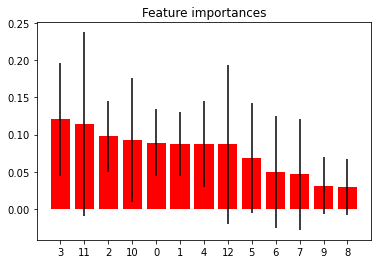

In [92]:
importances = trainedforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in trainedforest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Selected_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Selected_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Selected_X.shape[1]), indices)
plt.xlim([-1, Selected_X.shape[1]])
plt.show()

# ***Feature Selection***

# Univariate Feature Selection

In [93]:
min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X)

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=3).fit_transform(Scaled_X, Y)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new, Y, test_size = 0.30, random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))

0.40625
[[40  4]
 [19 25]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78        44
           1       0.86      0.57      0.68        44

    accuracy                           0.74        88
   macro avg       0.77      0.74      0.73        88
weighted avg       0.77      0.74      0.73        88



# Lasso Regression

In [96]:
from sklearn.linear_model import LassoCV
regr = LassoCV(cv=15, random_state=101)
regr.fit(x_train,y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(x_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))

LassoCV Best Alpha Scored:  0.03278434841586909
LassoCV Model Accuracy:  0.49424950560617664
Variables Eliminated:  16
Variables Kept:  12


Text(0.5, 1.0, 'Most Important Features Identified using Lasso')

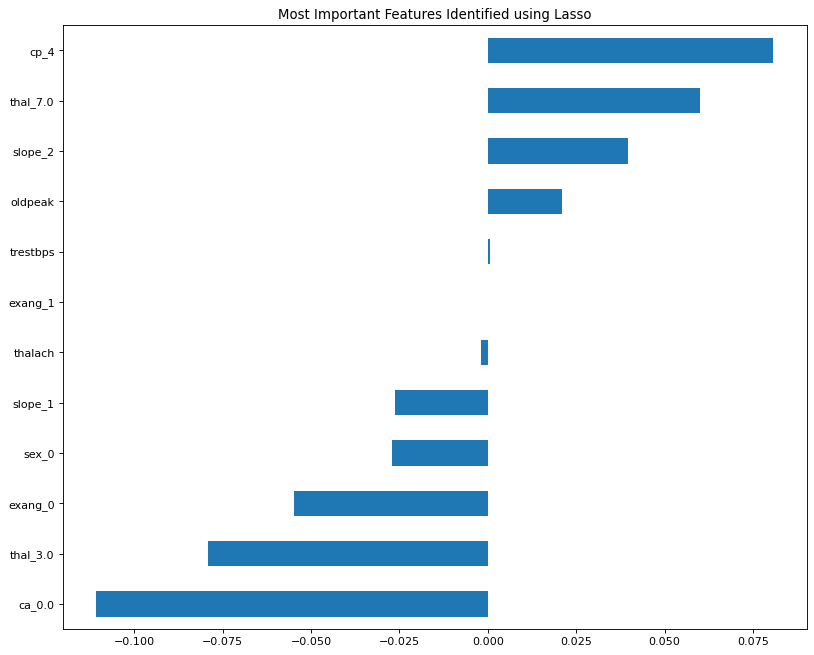

In [100]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso")